In [1]:
import numpy as np
import matplotlib.pyplot as plt
import qibo
import qibolab
from qibolab.paths import qibolab_folder

from qibolab.pulses import PulseSequence
from qibolab import Platform


print(qibo.__version__)
print(qibolab.__version__)

0.1.9
0.0.1.dev6


[Qibo 0.1.9|INFO|2023-02-02 11:15:09]: Loading platform tii_rfsoc4x2 from runcard /home/javierserrano/fpgaQCRdrivers/drivers/RFSoC4x2/qibolab/src/qibolab/runcards/tii_rfsoc4x2.yml
[Qibo 0.1.9|INFO|2023-02-02 11:15:09]: Connecting to tii_rfsoc4x2 instrument tii_rfsoc4x2.


Max freq:  7371500000


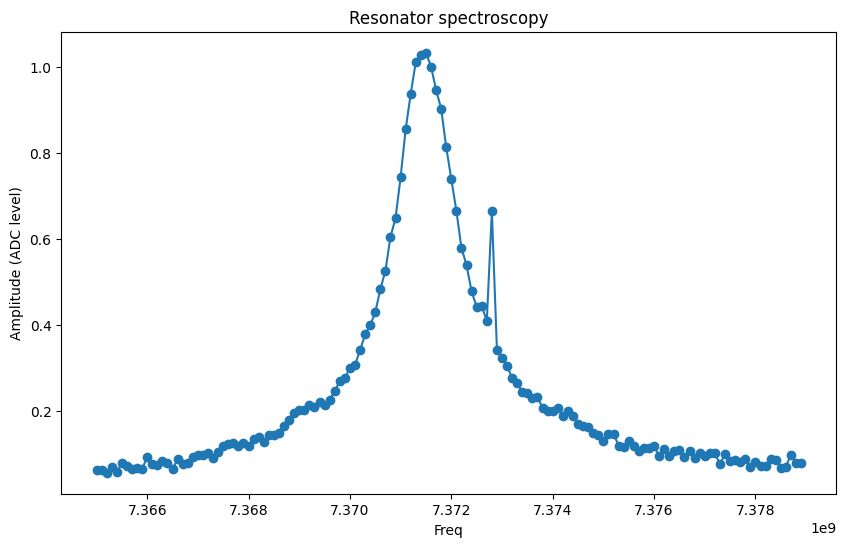

In [2]:
#
# Resonator spectroscopy
#

runcard = qibolab_folder / "runcards" / "tii_rfsoc4x2.yml"

platform = Platform("tii_rfsoc4x2")
platform.connect()
platform.setup()

start = 7365000000
stop =  7379000000
step = 100000
platform.connect()
platform.setup()
freqs = np.arange(start, stop, step)
length = 40
results = []
for i, freq in enumerate(freqs):
    qd_pulse = platform.create_RX_pulse(0, start=0)
    ro_pulse = platform.create_MZ_pulse(0, start=qd_pulse.start)
    platform.settings["native_gates"]["single_qubit"][0]["MZ"]["frequency"] = int(freq)
    sequence = PulseSequence()
    sequence.add(ro_pulse)

    platform.setup()
    msr, phase, avgi, avgq = platform.execute_pulse_sequence(sequence)
    results.append((avgi, avgq))

results = np.array(results)
amp = np.abs(results[:, 0] + 1j * results[:, 1])
plt.figure(figsize=(10, 6))
plt.plot(freqs, amp, 'o-')
plt.title("Resonator spectroscopy")
plt.xlabel("Freq")
plt.ylabel("Amplitude (ADC level)")
plt.savefig("")
print("Max freq: ",freqs[np.argmax(amp)])

Max freq:  7371600000


[Qibo 0.1.9|INFO|2023-02-02 12:53:24]: Loading platform tii_rfsoc4x2 from runcard /home/javierserrano/fpgaQCRdrivers/drivers/RFSoC4x2/qibolab/src/qibolab/runcards/tii_rfsoc4x2.yml
[Qibo 0.1.9|INFO|2023-02-02 12:53:24]: Connecting to tii_rfsoc4x2 instrument tii_rfsoc4x2.


Max freq:  5431500000


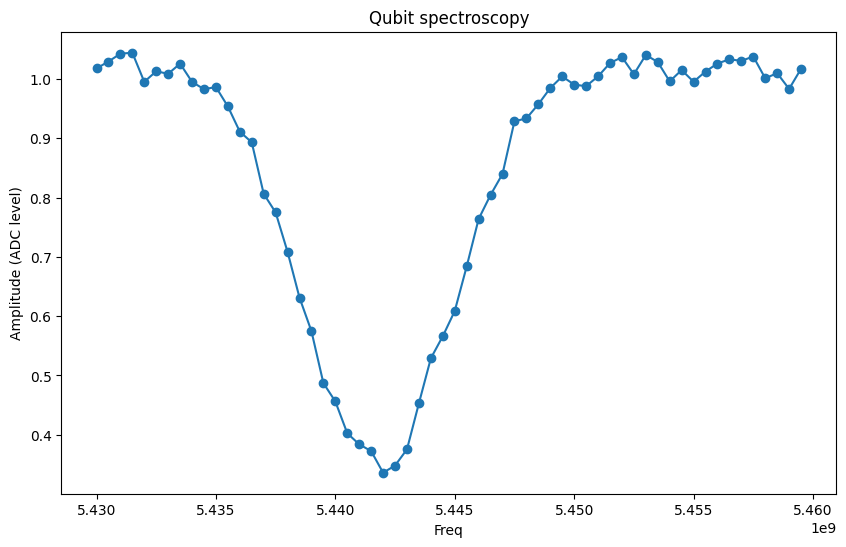

In [9]:
#
# Qubit spectroscopy
#

runcard = qibolab_folder / "runcards" / "tii_rfsoc4x2.yml"

platform = Platform("tii_rfsoc4x2")

platform.connect()
platform.setup()

start = 5430000000
stop =  5460000000
step =      500000
platform.connect()
platform.setup()
freqs = np.arange(start, stop, step)
results = []
for i, freq in enumerate(freqs):
    qd_pulse = platform.create_RX_pulse(0, start=0)
    ro_pulse = platform.create_MZ_pulse(0, start=qd_pulse.start)
    platform.settings["native_gates"]["single_qubit"][0]["RX"]["frequency"] = int(freq)
    sequence = PulseSequence()
    sequence.add(qd_pulse)
    sequence.add(ro_pulse)

    platform.setup()
    msr, phase, avgi, avgq = platform.execute_pulse_sequence(sequence)
    results.append((avgi, avgq))

results = np.array(results)
amp = np.abs(results[:, 0] + 1j * results[:, 1])
plt.figure(figsize=(10, 6))
plt.plot(freqs, amp, 'o-')
plt.title("Qubit spectroscopy")
plt.xlabel("Freq")
plt.ylabel("Amplitude (ADC level)")
plt.savefig("")
plt.ylim([0, 1.2])
print("Max freq: ",freqs[np.argmax(amp)])

In [16]:
#
# Qibo example
#

runcard = qibolab_folder / "runcards" / "tii_rfsoc4x2.yml"

platform = Platform("tii_rfsoc4x2")
platform.connect()
platform.setup()
qd_pulse0 = platform.create_RX_pulse(0, start=0)
qd_pulse1 = platform.create_RX_pulse(0, start=0)
qd_pulse2 = platform.create_RX_pulse(0, start=0)
ro_pulse1 = platform.create_MZ_pulse(0, start=qd_pulse1.duration)
sequence = PulseSequence()
sequence.add(qd_pulse0)
sequence.add(qd_pulse1)
sequence.add(qd_pulse2)
sequence.add(ro_pulse1)

result = platform.execute_pulse_sequence(sequence, nshots=100)



[Qibo 0.1.9|INFO|2023-02-01 16:37:45]: Loading platform tii_rfsoc4x2 from runcard /home/javierserrano/fpgaQCRdrivers/drivers/RFSoC4x2/qibolab/src/qibolab/runcards/tii_rfsoc4x2.yml
[Qibo 0.1.9|INFO|2023-02-01 16:37:45]: Connecting to tii_rfsoc4x2 instrument tii_rfsoc4x2.


(0.9361938179414031, 0.37836034911180183, 0.8699782962561042, 0.3458274552360282)


[Qibo 0.1.9|INFO|2023-02-03 11:37:18]: Loading platform tii_rfsoc4x2 from runcard /home/javierserrano/fpgaQCRdrivers/drivers/RFSoC4x2/qibolab/src/qibolab/runcards/tii_rfsoc4x2.yml
[Qibo 0.1.9|INFO|2023-02-03 11:37:18]: Connecting to tii_rfsoc4x2 instrument tii_rfsoc4x2.


(0.0, 1.0)

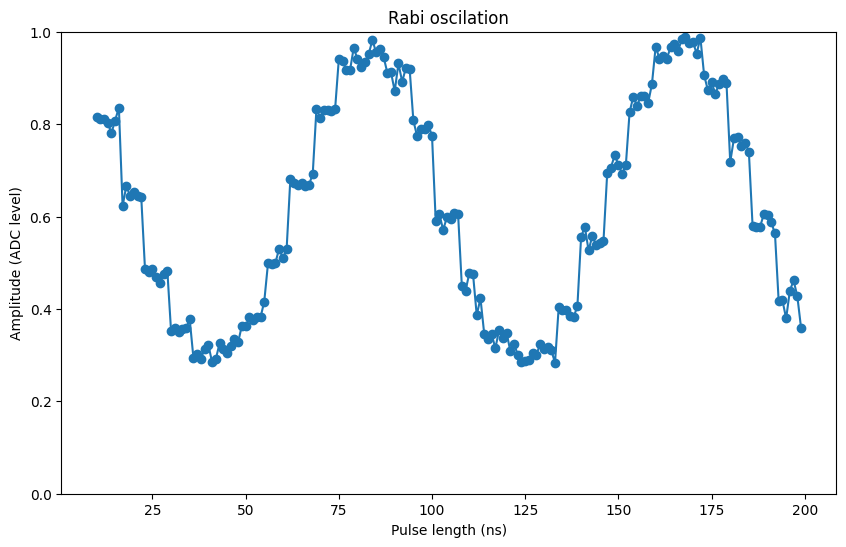

In [18]:
#
# Rabi oscillation - Length
#
runcard = qibolab_folder / "runcards" / "tii_rfsoc4x2.yml"

platform = Platform("tii_rfsoc4x2")

start = 10
step = 1
stop = 200
platform.connect()
platform.setup()
lengths = np.arange(start, stop, step)
results = []
for i, length in enumerate(lengths):
    qd_pulse = platform.create_RX_pulse(0, start=0)
    ro_pulse = platform.create_MZ_pulse(0, start=qd_pulse.start)
    qd_pulse.duration = length
    #qd_pulse.shape.rel_sigma = length/4

    sequence = PulseSequence()
    sequence.add(qd_pulse)
    sequence.add(ro_pulse)
    platform.setup()
    msr, phase, avgi, avgq = platform.execute_pulse_sequence(sequence)
    results.append((avgi, avgq))

results = np.array(results)
amp = np.abs(results[:, 0] + 1j * results[:, 1])
plt.figure(figsize=(10, 6))

plt.plot(lengths,amp,'o-');
plt.title("Rabi oscilation")
plt.xlabel("Pulse length (ns)")
plt.ylabel("Amplitude (ADC level)")
plt.ylim([0, 1.2])


[Qibo 0.1.9|INFO|2023-02-03 10:46:54]: Loading platform tii_rfsoc4x2 from runcard /home/javierserrano/fpgaQCRdrivers/drivers/RFSoC4x2/qibolab/src/qibolab/runcards/tii_rfsoc4x2.yml
[Qibo 0.1.9|INFO|2023-02-03 10:46:54]: Connecting to tii_rfsoc4x2 instrument tii_rfsoc4x2.


Text(0, 0.5, 'Amplitude (ADC level)')

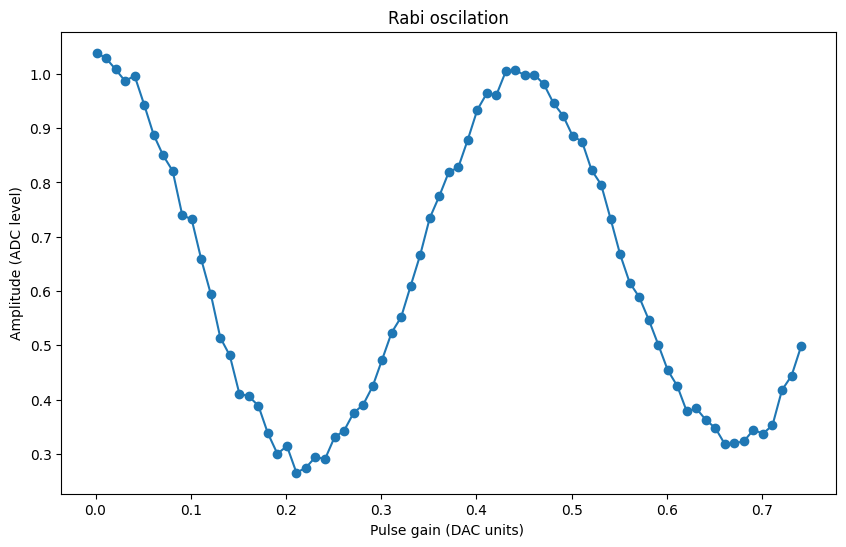

In [11]:
#
# Rabi oscillation - Gain
#
runcard = qibolab_folder / "runcards" / "tii_rfsoc4x2.yml"

platform = Platform("tii_rfsoc4x2")

start = 0.001
step = 0.01
stop = 0.75
platform.connect()
platform.setup()
amplitudes = np.arange(start, stop, step)
results = []
for i, amplitude in enumerate(amplitudes):
    qd_pulse = platform.create_RX_pulse(0, start=0)
    ro_pulse = platform.create_MZ_pulse(0, start=qd_pulse.start)
    qd_pulse.amplitude = amplitude
    
    sequence = PulseSequence()
    sequence.add(qd_pulse)
    sequence.add(ro_pulse)
    platform.setup()
    msr, phase, avgi, avgq = platform.execute_pulse_sequence(sequence)
    results.append((avgi, avgq))

results = np.array(results)
amp = np.abs(results[:, 0] + 1j * results[:, 1])
plt.figure(figsize=(10, 6))

plt.plot(amplitudes,amp,'o-');
plt.title("Rabi oscilation")
plt.xlabel("Pulse gain (DAC units) ")
plt.ylabel("Amplitude (ADC level)")
plt.ylim([0, 1.2])


[Qibo 0.1.9|INFO|2023-02-03 12:36:08]: Loading platform tii_rfsoc4x2 from runcard /home/javierserrano/fpgaQCRdrivers/drivers/RFSoC4x2/qibolab/src/qibolab/runcards/tii_rfsoc4x2.yml
[Qibo 0.1.9|INFO|2023-02-03 12:36:08]: Connecting to tii_rfsoc4x2 instrument tii_rfsoc4x2.


(0.0, 1.0)

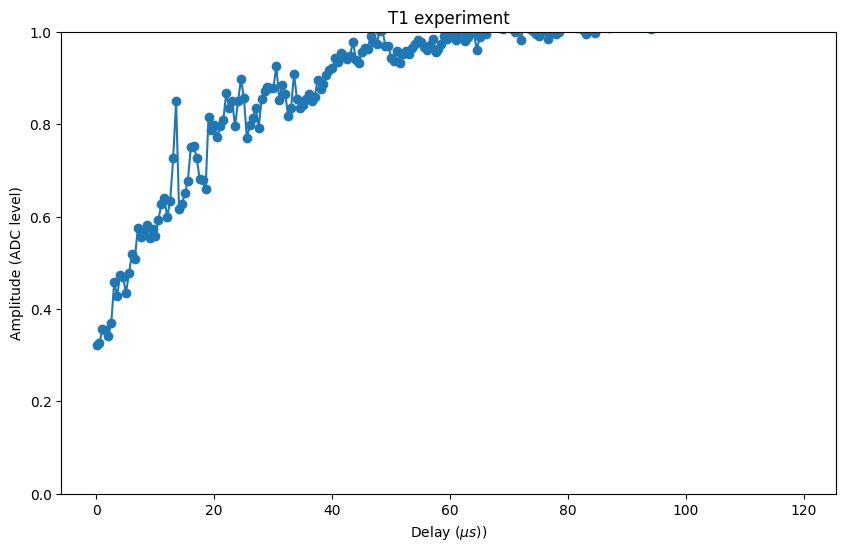

In [32]:
#
# T1 experiment
#
runcard = qibolab_folder / "runcards" / "tii_rfsoc4x2.yml"

platform = Platform("tii_rfsoc4x2")

start = 50
step = 500
stop = 120000
platform.connect()
platform.setup()
delays = np.arange(start, stop, step)
results = []
for i, delay in enumerate(delays):
    qd_pulse = platform.create_RX_pulse(0, start=0)
    ro_pulse = platform.create_MZ_pulse(0, start=delay)

    
    sequence = PulseSequence()
    sequence.add(qd_pulse)
    sequence.add(ro_pulse)
    platform.setup()
    msr, phase, avgi, avgq = platform.execute_pulse_sequence(sequence)
    results.append((avgi, avgq))

results = np.array(results)
amp = np.abs(results[:, 0] + 1j * results[:, 1])
plt.figure(figsize=(10, 6))

plt.plot(delays*0.001,amp,'o-');
plt.title("T1 experiment")
plt.xlabel("Delay ($\mu s$))")
plt.ylabel("Amplitude (ADC level)")
plt.ylim([0, 1])


(0.0, 1.2)

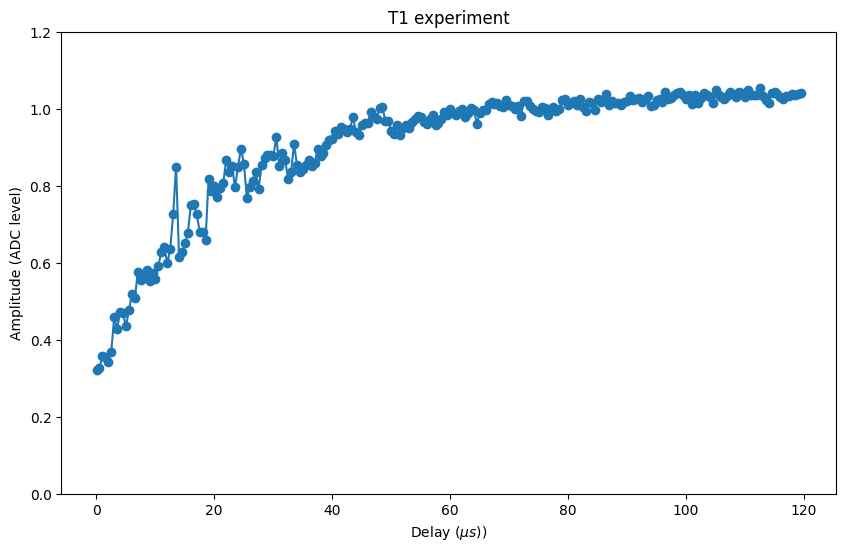

In [35]:
results = np.array(results)
amp = np.abs(results[:, 0] + 1j * results[:, 1])
plt.figure(figsize=(10, 6))

plt.plot(delays*0.001,amp,'o-');
plt.title("T1 experiment")
plt.xlabel("Delay ($\mu s$))")
plt.ylabel("Amplitude (ADC level)")
plt.ylim([0, 1.2])

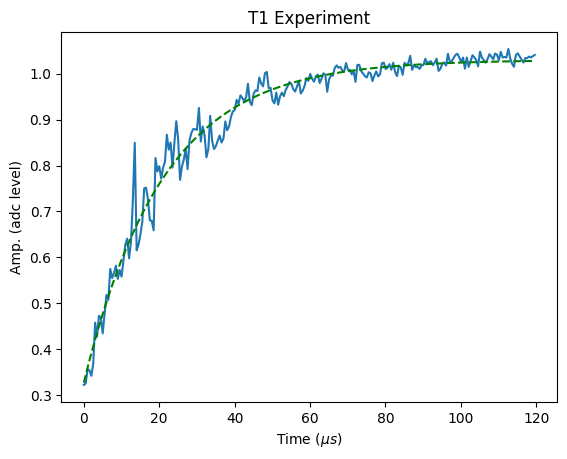

In [44]:
from scipy.optimize import curve_fit
def exp(x, p0,p1,p2):
    return p0 + p1 * np.exp(-1 * x * p2)

popt, pcov = curve_fit(exp, delays, amp,bounds=([-2.0,-2., -1.], [2., 0.,  1.]))
plt.subplot(111, title="T1 Experiment", xlabel=f"Time ($\mu s$)", ylabel="Amp. (adc level)")
plt.plot(delays*0.001, amp, delays*0.001, exp(delays, *popt), 'g--')

In [50]:
print("T1: ", 1/popt[2]*0.001, "mu_s")

T1:  20.894737030836538 mu_s


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import qibo
import qibolab
from qibolab.paths import qibolab_folder

from qibolab.pulses import PulseSequence
from qibolab import Platform


print(qibo.__version__)
print(qibolab.__version__)

0.1.9
0.0.1.dev6


In [40]:
#
# Single shot
#
runcard = qibolab_folder / "runcards" / "tii_rfsoc4x2.yml"

platform = Platform("tii_rfsoc4x2")

platform.connect()
platform.setup()

N=1000
data = np.zeros((4, N))
for i in range(N):
    qd_pulse = platform.create_RX_pulse(0, start=0)
    ro_pulse = platform.create_MZ_pulse(0, start=0)
    sequence = PulseSequence()
    sequence.add(qd_pulse)
    sequence.add(ro_pulse)
    msr, phase, e_avgi, e_avgq = platform.execute_pulse_sequence(sequence)
    data[2][i]=e_avgi
    data[3][i]=e_avgq

for i in range(N):
    ro_pulse = platform.create_MZ_pulse(0, start=0)
    sequence = PulseSequence()
    sequence.add(ro_pulse)
    msr, phase, g_avgi, g_avgq = platform.execute_pulse_sequence(sequence)
    g_results.append((g_avgi, g_avgq))
    data[0][i]=g_avgi
    data[1][i]=g_avgq


[Qibo 0.1.9|INFO|2023-02-03 14:53:26]: Loading platform tii_rfsoc4x2 from runcard /home/javierserrano/fpgaQCRdrivers/drivers/RFSoC4x2/qibolab/src/qibolab/runcards/tii_rfsoc4x2.yml
[Qibo 0.1.9|INFO|2023-02-03 14:53:26]: Connecting to tii_rfsoc4x2 instrument tii_rfsoc4x2.


In [37]:
import numpy as np
import matplotlib.pyplot as plt
#Figure params
#rcParams['figure.figsize'] = 16, 8
#rcParams.update({'font.size': 22})

#helper functions
def hist(data=None, plot=True, ran=1.0):
    
    ig = data[0]
    qg = data[1]
    ie = data[2]
    qe = data[3]

    numbins = 200
    
    xg, yg = np.median(ig), np.median(qg)
    xe, ye = np.median(ie), np.median(qe)

    if plot==True:
        fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))
        fig.tight_layout()

        axs[0].scatter(ig, qg, label='g', color='b', marker='*')
        axs[0].scatter(ie, qe, label='e', color='r', marker='*')
        axs[0].scatter(xg, yg, color='k', marker='o')
        axs[0].scatter(xe, ye, color='k', marker='o')
        axs[0].set_xlabel('I (a.u.)')
        axs[0].set_ylabel('Q (a.u.)')
        axs[0].legend(loc='upper right')
        axs[0].set_title('Unrotated')
        axs[0].axis('equal')
    """Compute the rotation angle"""
    theta = -np.arctan2((ye-yg),(xe-xg))
    """Rotate the IQ data"""
    ig_new = ig*np.cos(theta) - qg*np.sin(theta)
    qg_new = ig*np.sin(theta) + qg*np.cos(theta) 
    ie_new = ie*np.cos(theta) - qe*np.sin(theta)
    qe_new = ie*np.sin(theta) + qe*np.cos(theta)
    
    """New means of each blob"""
    xg, yg = np.median(ig_new), np.median(qg_new)
    xe, ye = np.median(ie_new), np.median(qe_new)
    
    #print(xg, xe)
    
    xlims = [xg-ran, xg+ran]
    ylims = [yg-ran, yg+ran]

    if plot==True:
        axs[1].scatter(ig_new, qg_new, label='g', color='b', marker='*')
        axs[1].scatter(ie_new, qe_new, label='e', color='r', marker='*')
        axs[1].scatter(xg, yg, color='k', marker='o')
        axs[1].scatter(xe, ye, color='k', marker='o')    
        axs[1].set_xlabel('I (a.u.)')
        axs[1].legend(loc='lower right')
        axs[1].set_title('Rotated')
        axs[1].axis('equal')

        """X and Y ranges for histogram"""
        
        ng, binsg, pg = axs[2].hist(ig_new, bins=numbins, range = xlims, color='b', label='g', alpha=0.5)
        ne, binse, pe = axs[2].hist(ie_new, bins=numbins, range = xlims, color='r', label='e', alpha=0.5)
        axs[2].set_xlabel('I(a.u.)')       
        
    else:        
        ng, binsg = np.histogram(ig_new, bins=numbins, range = xlims)
        ne, binse = np.histogram(ie_new, bins=numbins, range = xlims)

    """Compute the fidelity using overlap of the histograms"""
    contrast = np.abs(((np.cumsum(ng) - np.cumsum(ne)) / (0.5*ng.sum() + 0.5*ne.sum())))
    tind=contrast.argmax()
    threshold=binsg[tind]
    fid = contrast[tind]
    axs[2].set_title(f"Fidelity = {fid*100:.2f}%")

    return fid, threshold, theta

Optimal fidelity after rotation = 0.708


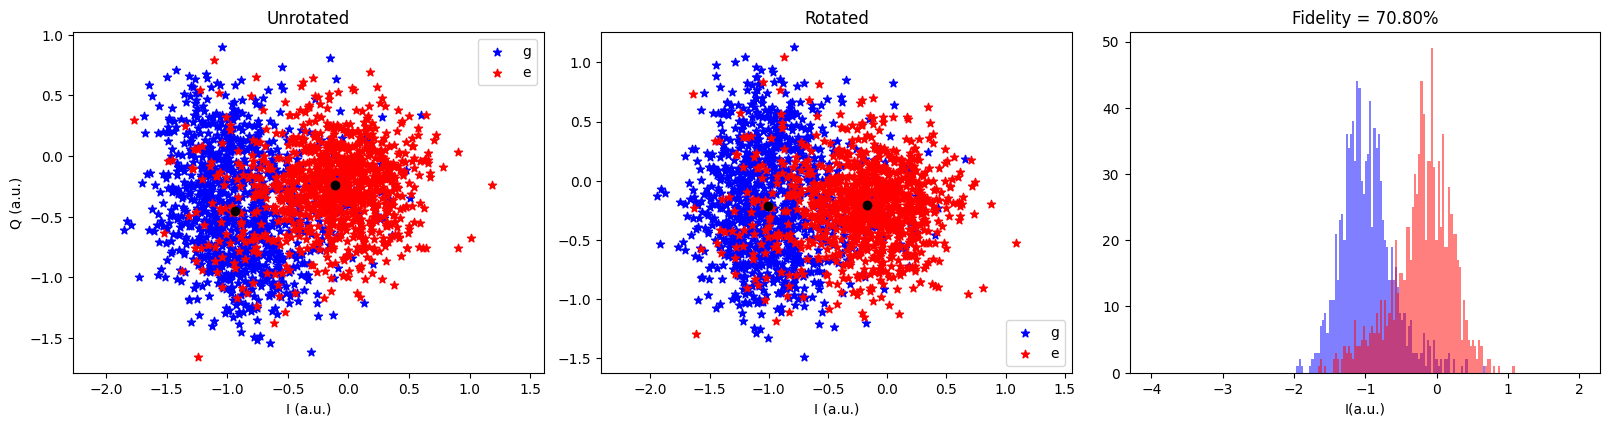

In [41]:
fid, threshold, angle = hist(data=data,  plot=True, ran=3)
print('Optimal fidelity after rotation = %.3f' % fid)